# All Imports

In [2]:
import numpy as np
import pandas as pd
import random
from lazypredict.Supervised import LazyClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# Initializing the default values for seed and train test split

In [3]:

# seed = random.randint(1000, 9999)   # 7458

# Load your dataset

df = pd.read_csv("ACME-HappinessSurvey2020.csv")


# Define the features (X) and the target variable (y)

seed = 7458

X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]


y = df['Y']


# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=seed)


# Using Lazy Predict to test all models accuracy

In [4]:


# Initialize the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the models and make predictions
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
print(models)


100%|██████████| 31/31 [00:00<00:00, 41.27it/s]

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

# Observation
                                   Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \

DecisionTreeClassifier             0.65               0.64     0.64      0.65   
RandomForestClassifier             0.65               0.63     0.63      0.64   
BaggingClassifier                  0.65               0.63     0.63      0.64   

# Decision Tree Classifier

In [5]:


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=seed)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6538461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.69      0.73      0.71        15

    accuracy                           0.65        26
   macro avg       0.64      0.64      0.64        26
weighted avg       0.65      0.65      0.65        26



# Random Forest Classifier 

In [6]:


# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=seed)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26



# BaggingClassifier

In [7]:


bg = BaggingClassifier(random_state=seed)
bg.fit(X_train, y_train)
y_pred_bg = bg.predict(X_test)
print("BaggingClassifier Classification Report:")
print(classification_report(y_test, y_pred_bg))


BaggingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26



# Confusion Matrix

In [8]:


# Initialize classifiers
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
bagging = BaggingClassifier(random_state=seed)

# Train classifiers
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
bagging.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_bagging = bagging.predict(X_test)

# Confusion matrices
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Print confusion matrices
print("Confusion Matrix for DecisionTreeClassifier:")
print(conf_matrix_dt)

print("\nConfusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)

print("\nConfusion Matrix for BaggingClassifier:")
print(conf_matrix_bagging)


Confusion Matrix for DecisionTreeClassifier:
[[ 6  5]
 [ 4 11]]

Confusion Matrix for RandomForestClassifier:
[[ 5  6]
 [ 4 11]]

Confusion Matrix for BaggingClassifier:
[[ 5  6]
 [ 4 11]]


# Observation:
### Based on above results we can see that the best algorithm at predicting class 0 unhappy customers is Decision Tree is the better model of the 3 since it has an  **f1 score of 0.57** which is higher than the other 2 models. and 
### **11 for true negatives in the confusion matrix.**

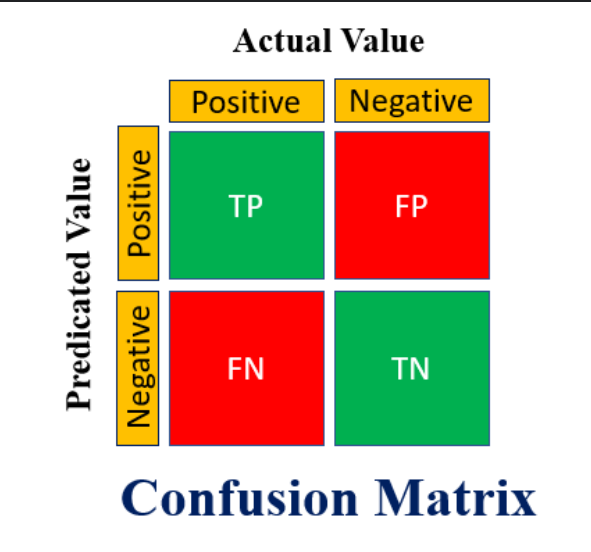

# TODO: add more estimators for stacking and voting

## Ensemble Techniques: Stacking and Voting 

In [9]:
y_stack_test = y_test

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
bg = BaggingClassifier(random_state=seed)

# Stacking
estimators = [
    ('dt', dt),
    ('rf', rf),
    ('bg', bg)
]

# Create stacking classifier with RandomForest as final estimator
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(random_state=seed),
    cv=5
)

# Fit and predict using stacking
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

# Print classification report for stacking
print("Stacking Classification Report:")
print(classification_report(y_stack_test, y_pred_stack))


# Voting (both hard and soft voting)
voting_hard = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

voting_soft = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# Fit and predict using hard voting
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)

# Fit and predict using soft voting
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)

# Print classification reports for voting
print("\nHard Voting Classification Report:")
print(classification_report(y_test, y_pred_hard))

print("\nSoft Voting Classification Report:")
print(classification_report(y_test, y_pred_soft))

# # Individual model performance for comparison
# models = {'Decision Tree': dt, 'Random Forest': rf, 'Bagging': bg}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"\n{name} Classification Report:")
#     print(classification_report(y_test, y_pred))


Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.73      0.73      0.73        15

    accuracy                           0.69        26
   macro avg       0.68      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26


Hard Voting Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26


Soft Voting Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.61      0.73      0.67        15

    accuracy                           0.58        26
   macro avg       0.56 

### Result: Stacking has improved f1 score from 0.5 to 0.64 , which is 14% improvement

# Confusion matrix of Stacking

In [10]:
conf_matrix_stack = confusion_matrix(y_stack_test, y_pred_stack)
print(conf_matrix_stack)


[[ 7  4]
 [ 4 11]]


# Testing other models:   **Xgboost** and **lighgbm** 

In [11]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=seed
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# LightGBM
lgb_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=seed
)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)

print("\nLightGBM Classification Report:")
print(classification_report(y_test, lgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.62      0.67      0.65        15

    accuracy                           0.58        26
   macro avg       0.56      0.56      0.56        26
weighted avg       0.57      0.58      0.57        26

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

## Observation:

Out of the 2 models , Xgboost has a higher f1score for class 0 , which is also higher than Decision Tree Classifier ; 0.62 / 0.57 respectively


# Confusion Matrix Xgboost

In [12]:
conf_matrix_stack = confusion_matrix(y_stack_test, y_pred_stack)
print(conf_matrix_stack)


[[ 7  4]
 [ 4 11]]


### Observation: Confusion matrix has only improved for Class 1 which we are not interested in 


# Recursive Feature Elimination


In [13]:


rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

# for i, col in zip(range(X.shape[1], X.columns)):
#     print(f"{col} selected={rfe.support_[i]} rank = {rfe.ranking_[i]}")

# Print results for each feature
for i, col in enumerate(X.columns):
    print(f"{col}: selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

# Alternative: Get selected features as a list
selected_features = X.columns[rfe.support_].tolist()
print("\nSelected features:", selected_features)


X1: selected=True rank=1
X2: selected=True rank=1
X3: selected=False rank=2
X4: selected=False rank=4
X5: selected=True rank=1
X6: selected=False rank=3

Selected features: ['X1', 'X2', 'X5']


# Testing new model accuracy of **Decision Tree Classifier** with the selected features via the Recursive feature elimination


In [14]:
X = df[selected_features]  # passing in selected features from rfe
y = df['Y']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=.2, random_state=seed)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


# 5. Make predictions on test set
y_pred = model.predict(X_test)


# 6. Print results
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")

print(classification_report(y_test, y_pred))

# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
#     X, y, test_size=0.2, random_state=seed)



Accuracy: 0.6153846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.73      0.53      0.62        15

    accuracy                           0.62        26
   macro avg       0.63      0.63      0.62        26
weighted avg       0.65      0.62      0.62        26



# Xgboost Accuracy with RFE results

In [15]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=seed
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.77      0.67      0.71        15

    accuracy                           0.69        26
   macro avg       0.69      0.70      0.69        26
weighted avg       0.70      0.69      0.69        26



### Observation : Xgboost after RFE gives **f1-score** of **0.67** where as Decision Tree Classifer gives **f1-score** after RFE as **0.62** for **class 0**

# Applying State of the art Hyperparameter Optimizations to overall best performing model **XGboost**

100%|██████████| 200/200 [00:13<00:00, 14.80trial/s, best loss: -0.7272727272727273]
Best parameters found: {'max_depth': 7, 'learning_rate': 0.0761215592221903, 'n_estimators': 400, 'min_child_weight': 1, 'gamma': 4.2155095817293875e-08, 'subsample': 0.9117757979226273, 'colsample_bytree': 0.8324860943692641, 'scale_pos_weight': 2, 'max_delta_step': 9}
[0]	validation_0-logloss:0.68038
[1]	validation_0-logloss:0.68009
[2]	validation_0-logloss:0.67697
[3]	validation_0-logloss:0.66941
[4]	validation_0-logloss:0.67278
[5]	validation_0-logloss:0.66778
[6]	validation_0-logloss:0.67059
[7]	validation_0-logloss:0.67473
[8]	validation_0-logloss:0.68022
[9]	validation_0-logloss:0.68478
[10]	validation_0-logloss:0.68339
[11]	validation_0-logloss:0.68230
[12]	validation_0-logloss:0.68769
[13]	validation_0-logloss:0.68492
[14]	validation_0-logloss:0.68991
[15]	validation_0-logloss:0.68687
[16]	validation_0-logloss:0.68467
[17]	validation_0-logloss:0.68328
[18]	validation_0-logloss:0.68088
[19]	val

<Figure size 1000x600 with 0 Axes>

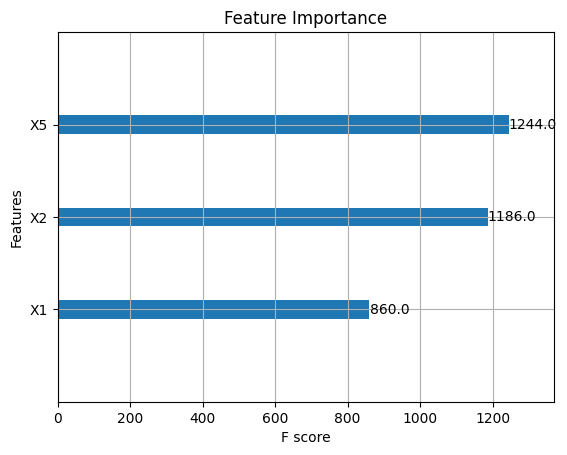

In [16]:

X = df[selected_features]
y = df['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed
)

# Modified search space focusing on parameters that help with imbalanced data
space = {
    'max_depth': hp.choice('max_depth', range(3, 8)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', range(100, 501, 50)),
    'min_child_weight': hp.choice('min_child_weight', range(1, 6)),
    'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(0.5)),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0),
    # Added for imbalanced data
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 2, 3, 4, 5]),
    # Added for imbalanced data
    'max_delta_step': hp.choice('max_delta_step', range(1, 10))
}


def objective(params):
    # Create XGBoost classifier with the suggested parameters
    model = xgb.XGBClassifier(
        **params,
        random_state=seed,
        use_label_encoder=False
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate f1 score specifically for class 0
    f1 = f1_score(y_test, y_pred, pos_label=0)

    # We want to maximize f1 score, so return negative
    return {'loss': -f1, 'status': STATUS_OK}


# Run the optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,  # Increased number of trials
    trials=trials
)

# Convert the best parameters
best_params = {
    'max_depth': best['max_depth'] + 3,
    'learning_rate': best['learning_rate'],
    'n_estimators': best['n_estimators'] * 50 + 100,
    'min_child_weight': best['min_child_weight'] + 1,
    'gamma': best['gamma'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'scale_pos_weight': best['scale_pos_weight'] + 1,
    'max_delta_step': best['max_delta_step'] + 1
}

print("Best parameters found:", best_params)

# Train final model with best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    random_state=seed,
    use_label_encoder=False
)

# Add sample weights to focus on class 0
sample_weights = np.where(y_train == 0, 2, 1)

# Fit the final model
final_model.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Make predictions
y_pred = final_model.predict(X_test)

# Print final results
print("\nFinal Model Performance:")
print(classification_report(y_test, y_pred))

# Track the best f1 score for class 0
best_f1 = f1_score(y_test, y_pred, pos_label=0)
print(f"\nBest F1 Score for Class 0: {best_f1:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model)
plt.title('Feature Importance')
plt.show()


In [ ]:
import joblib

# ... (rest of the code remains the same)

# Train final model with best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    random_state=seed,
    use_label_encoder=False
)

# ... (rest of the code remains the same)

# Save the best model to a file
joblib.dump(final_model, 'best_model.joblib')


['best_model.joblib']

# Random Test to increase accuracy further:

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from hyperopt import hp, fmin, tpe, Trials
import joblib

# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', range(3, 8)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', range(100, 501, 50)),
    'min_child_weight': hp.choice('min_child_weight', range(1, 6)),
    'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(0.5)),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0),
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 2, 3, 4, 5]),
    'max_delta_step': hp.choice('max_delta_step', range(1, 10))
}

# Initialize the best F1 score and the best model
best_f1 = 0
best_model = None

while True:
    # Perform hyperparameter tuning
    trials = Trials()
    best = fmin(
        fn=objective,
        space=space,
        algo=tpe.suggest,
        max_evals=200,
        trials=trials
    )

    # Convert the best parameters
    best_params = {
        'max_depth': best['max_depth'] + 3,
        'learning_rate': best['learning_rate'],
        'n_estimators': best['n_estimators'] * 50 + 100,
        'min_child_weight': best['min_child_weight'] + 1,
        'gamma': best['gamma'],
        'subsample': best['subsample'],
        'colsample_bytree': best['colsample_bytree'],
        'scale_pos_weight': best['scale_pos_weight'] + 1,
        'max_delta_step': best['max_delta_step'] + 1
    }

    # Train the final model with the best parameters
    final_model = xgb.XGBClassifier(
        **best_params,
        random_state=seed,
        use_label_encoder=False
    )

    # Use SMOTE to oversample the minority class
    smote = SMOTE(random_state=seed)
    X_res, y_res = smote.fit_resample(X_train, y_train)

    # Fit the final model with the resampled data
    final_model.fit(X_res, y_res)

    # Predict
    y_pred = final_model.predict(X_test)

    # Calculate F1 score specifically for class 0
    f1 = f1_score(y_test, y_pred, pos_label=0)

    # Calculate classification report
    report = classification_report(y_test, y_pred)

    # Check if this is the best F1 score so far
    if f1 > best_f1:
        best_f1 = f1
        best_model = final_model
        print("New best F1 score:", f1)
        print("Classification Report:")
        print(report)
        joblib.dump(best_model, 'best_model_class_0.joblib')

    # If the F1 score is not improving, stop the loop
    if f1 < best_f1 * 0.99:  # adjust the threshold as needed
        break

print("Final best F1 score:", best_f1)
print("Final Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))


100%|██████████| 200/200 [00:11<00:00, 17.06trial/s, best loss: -0.7272727272727273]
New best F1 score: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.80      0.80      0.80        15

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26

100%|██████████| 200/200 [00:13<00:00, 15.29trial/s, best loss: -0.7272727272727273]
Final best F1 score: 0.7272727272727273
Final Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.80      0.80      0.80        15

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26

